In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Cargar el dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Verificar los primeros registros
print(dataset.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Verificar información del dataset
dataset.info()

# Descripción estadística del dataset
print(dataset.describe())

# Visualizar nombres de columnas
print(dataset.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000         

In [4]:
# Revisar si hay valores faltantes
print(dataset.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Imputar valores faltantes con la media (ejemplo para columnas numéricas)
dataset.fillna(dataset.mean(), inplace=True)

# Verificar que ya no hay valores faltantes
print(dataset.isnull().sum())


TypeError: Could not convert ['MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMale'] to numeric

In [6]:
# Eliminar columnas innecesarias (ajusta según los nombres de columnas)
dataset.drop(['CustomerID'], axis=1, inplace=True)  # Ajusta el nombre si es diferente


In [7]:
# Convertir la columna Gender a valores numéricos
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})
print(dataset.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Escalar todas las columnas numéricas al rango [0, 1]
scaler = MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Verificar las primeras filas del dataset escalado
print(dataset_scaled.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     0.0  0.019231            0.000000                0.387755
1     0.0  0.057692            0.000000                0.816327
2     1.0  0.038462            0.008197                0.051020
3     1.0  0.096154            0.008197                0.775510
4     1.0  0.250000            0.016393                0.397959


In [9]:
# Selección manual de las características más relevantes
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Ajusta según las columnas relevantes
dataset_selected = dataset_scaled[features]

# Mostrar las primeras filas del dataset seleccionado
print(dataset_selected.head())


        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


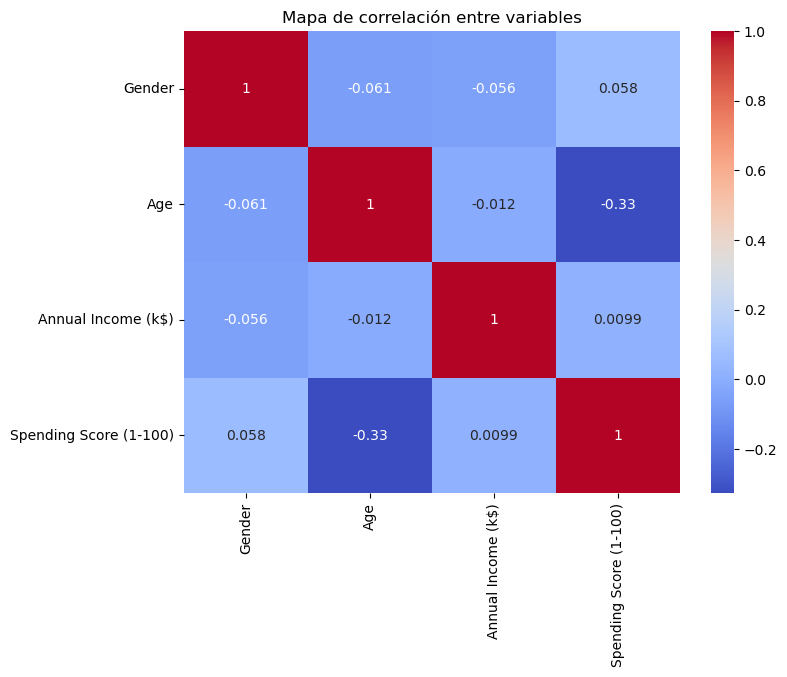

In [10]:
# Heatmap de correlación para entender relaciones entre variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(dataset_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación entre variables")
plt.show()


In [11]:
from sklearn.cluster import KMeans


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

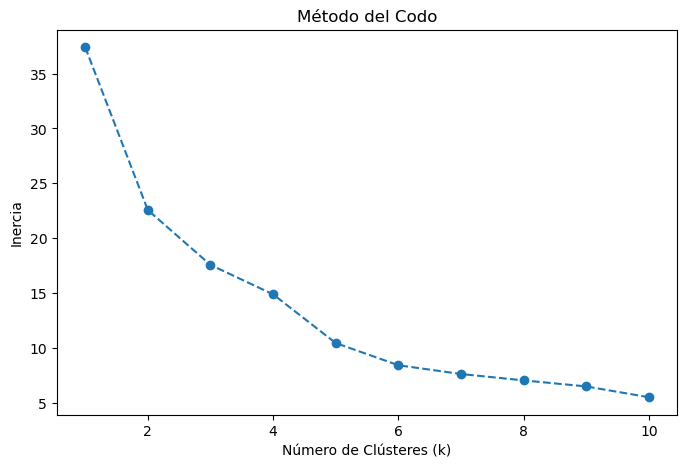

In [12]:
# Lista para almacenar la inercia (suma de distancias al centroide)
inertia = []

# Probar diferentes valores de k (de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_selected)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.show()


In [13]:
# Número óptimo de clústeres (ajusta según el codo)
optimal_k = 5  # Reemplaza este valor según tu gráfico del método del codo

# Entrenar el modelo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(dataset_selected)

# Añadir las etiquetas de clúster al dataset
dataset_selected['Cluster'] = kmeans.labels_

# Visualizar las primeras filas con los clústeres asignados
print(dataset_selected.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  0.019231            0.000000                0.387755        4
1  0.057692            0.000000                0.816327        4
2  0.038462            0.008197                0.051020        2
3  0.096154            0.008197                0.775510        4
4  0.250000            0.016393                0.397959        4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
from sklearn.cluster import AgglomerativeClustering


In [15]:
# Entrenar el modelo de clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(dataset_selected)

# Añadir las etiquetas de clúster jerárquico al dataset
dataset_selected['Hierarchical Cluster'] = hierarchical_labels

# Visualizar las primeras filas con los clústeres asignados
print(dataset_selected.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0  0.019231            0.000000                0.387755        4   
1  0.057692            0.000000                0.816327        4   
2  0.038462            0.008197                0.051020        2   
3  0.096154            0.008197                0.775510        4   
4  0.250000            0.016393                0.397959        4   

   Hierarchical Cluster  
0                     0  
1                     0  
2                     4  
3                     0  
4                     0  


In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcular métricas para K-Means
silhouette_kmeans = silhouette_score(dataset_selected.iloc[:, :-2], dataset_selected['Cluster'])
calinski_kmeans = calinski_harabasz_score(dataset_selected.iloc[:, :-2], dataset_selected['Cluster'])
davies_kmeans = davies_bouldin_score(dataset_selected.iloc[:, :-2], dataset_selected['Cluster'])

# Mostrar resultados
print("Desempeño del modelo K-Means:")
print(f"Coeficiente de Silhouette: {silhouette_kmeans:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_kmeans:.4f}")
print(f"Índice de Davies-Bouldin: {davies_kmeans:.4f}")


Desempeño del modelo K-Means:
Coeficiente de Silhouette: 0.4042
Índice de Calinski-Harabasz: 125.9310
Índice de Davies-Bouldin: 0.9387


In [17]:
# Calcular métricas para Clustering Jerárquico
silhouette_hierarchical = silhouette_score(dataset_selected.iloc[:, :-2], dataset_selected['Hierarchical Cluster'])
calinski_hierarchical = calinski_harabasz_score(dataset_selected.iloc[:, :-2], dataset_selected['Hierarchical Cluster'])
davies_hierarchical = davies_bouldin_score(dataset_selected.iloc[:, :-2], dataset_selected['Hierarchical Cluster'])

# Mostrar resultados
print("\nDesempeño del modelo Clustering Jerárquico:")
print(f"Coeficiente de Silhouette: {silhouette_hierarchical:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_hierarchical:.4f}")
print(f"Índice de Davies-Bouldin: {davies_hierarchical:.4f}")



Desempeño del modelo Clustering Jerárquico:
Coeficiente de Silhouette: 0.4042
Índice de Calinski-Harabasz: 125.9310
Índice de Davies-Bouldin: 0.9387


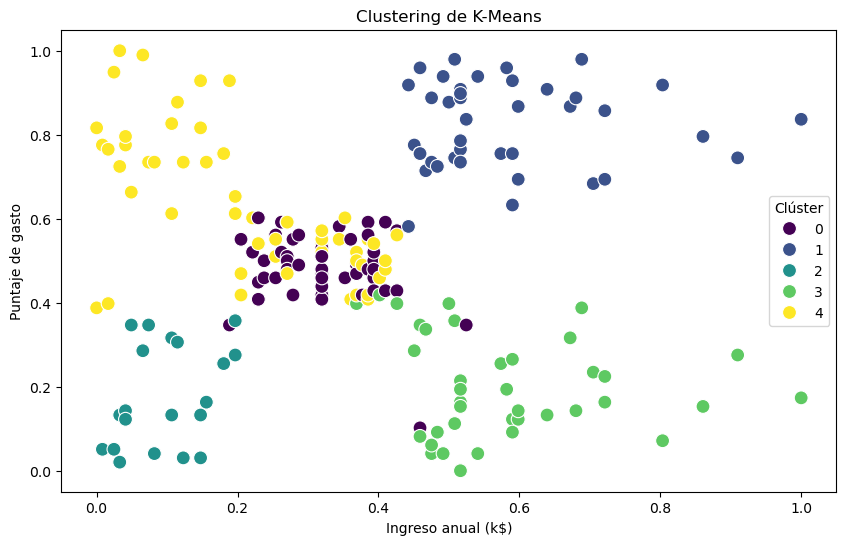

In [18]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con K-Means
sns.scatterplot(
    x=dataset_selected['Annual Income (k$)'], 
    y=dataset_selected['Spending Score (1-100)'], 
    hue=dataset_selected['Cluster'], 
    palette='viridis',
    s=100
)
plt.title("Clustering de K-Means")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Puntaje de gasto")
plt.legend(title="Clúster")
plt.show()


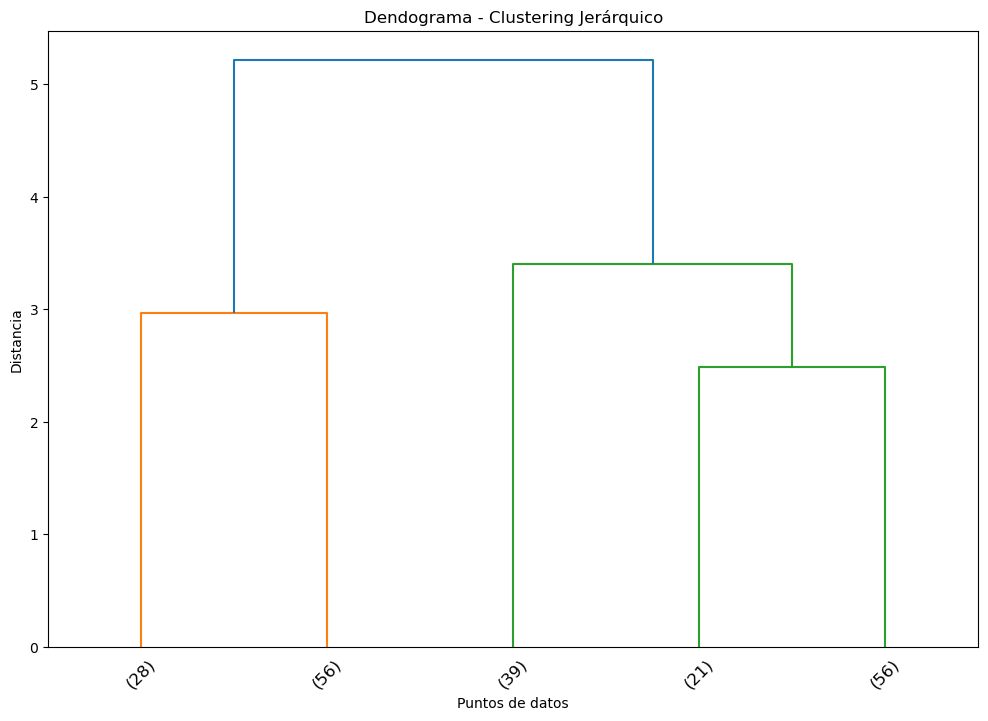

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Crear el dendograma
plt.figure(figsize=(12, 8))
Z = linkage(dataset_selected.iloc[:, :-2], method='ward')
dendrogram(Z, truncate_mode='lastp', p=optimal_k, leaf_rotation=45, leaf_font_size=12)
plt.title("Dendograma - Clustering Jerárquico")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()


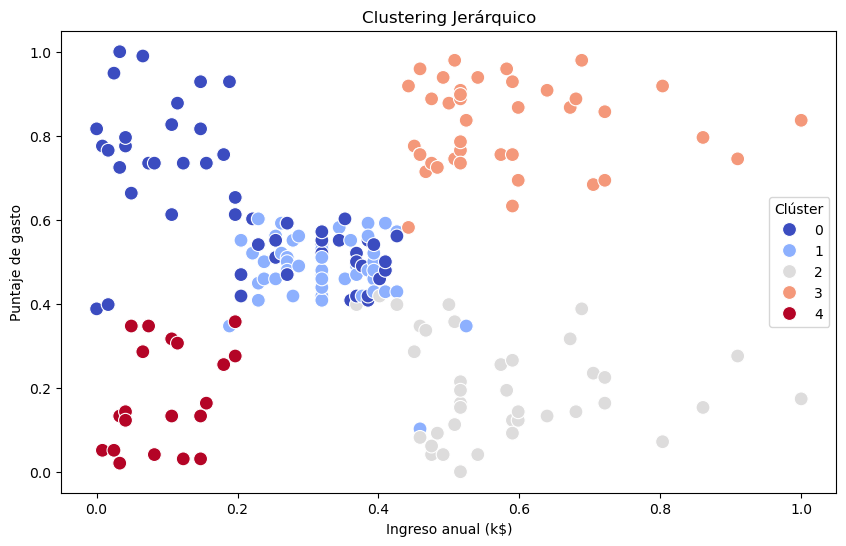

In [20]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con clustering jerárquico
sns.scatterplot(
    x=dataset_selected['Annual Income (k$)'], 
    y=dataset_selected['Spending Score (1-100)'], 
    hue=dataset_selected['Hierarchical Cluster'], 
    palette='coolwarm',
    s=100
)
plt.title("Clustering Jerárquico")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Puntaje de gasto")
plt.legend(title="Clúster")
plt.show()
